In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [3]:
df = pd.read_csv('Datasets/Twitter Tweets/Tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [21]:
print(df.columns)
print(len(df[df['sentiment']=='positive']))
print(len(df[df['sentiment']=='negative']))
print(len(df[df['sentiment']=='neutral']))
df.describe()

Index(['text', 'selected_text', 'sentiment'], dtype='object')
8582
7782
11118


,text,selected_text,sentiment
count,27481,27482,27482
unique,27408,21249,3
top,good morning,happy,neutral
freq,6,316,11118


In [5]:
df = df.drop('textID', axis=1)

df['text'] = df['text'].str.strip().str.lower()
df['selected_text'] = df['selected_text'].str.strip().str.lower()

In [6]:
df.head()

,text,selected_text,sentiment
0,"i`d have responded, if i were going","i`d have responded, if i were going",neutral
1,sooo sad i will miss you here in san diego!!!,sooo sad,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"sons of ****, why couldn`t they put them on th...","sons of ****,",negative


In [7]:
print(type(df['selected_text'][0]))

<class 'str'>


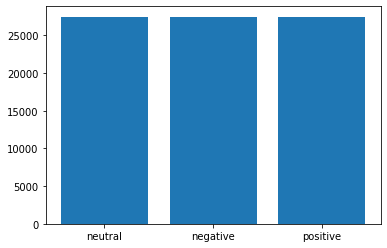

In [8]:
plt.bar(df["sentiment"], df["sentiment"].count())
#fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
#fig.update_layout(title_text='Product Score')
plt.show()

In [9]:
def remove_punctuation(text):
    text = str(text)
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!",'"'))
    return final

In [10]:
#df['text'] = df['text'].apply(remove_punctuation)
df['selected_text'] = df['selected_text'].apply(remove_punctuation)

In [11]:
X, Y = df['selected_text'], df['sentiment']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)

### Vectorize 1

In [12]:
vec = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, use_idf = True)
train_vectors = vec.fit_transform(trainX.values.astype('U'))
test_vectors = vec.transform(testX.values.astype('U'))

### Vectorize 2

In [13]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_vectors = vectorizer.fit_transform(trainX)
test_vectors = vectorizer.transform(testX)

In [14]:
testTweet = 'I am really enyoing this movie!'

In [15]:
from sklearn.naive_bayes import MultinomialNB, BaseNB, GaussianNB, BernoulliNB, ComplementNB, CategoricalNB, BaseDiscreteNB

NB_model = MultinomialNB(fit_prior=False)
NB_model.fit(train_vectors, trainY)

ImportError: cannot import name 'BaseNB' from 'sklearn.naive_bayes' (/Users/Joe/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py)

In [ ]:
NB_model.score(test_vectors, testY)
#0.6448972166636348

0.8062579588866654

In [ ]:
NB_model.predict(vec.transform([testTweet]))[0]

'neutral'

In [ ]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='linear')
SVC_model.fit(train_vectors, trainY)

SVC(kernel='linear')

In [ ]:
SVC_model.score(test_vectors, testY)

0.8166272512279426

In [ ]:
SVC_model.predict(vec.transform([testTweet]))[0]

'negative'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(train_vectors, trainY)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
KNN_model.score(test_vectors, testY)

0.4620702201200655

In [ ]:
KNN_model.predict(vec.transform([testTweet]))[0]

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2512 while Y.shape[1] == 3823

### Comparisson

In [ ]:
#testTweet = vec.transform(["Maybe I'm mad but I'm now the proud owner of a potentially #bendy #iPhone6, it's so much bigger than the #4s"])
#testTweet = vec.transform(["Finally got to see an iPhone 6 today. Not revolutionary at all but it's absolutely gorgeous.(And I want one)"])
testTweet = vec.transform(["I'm not sure I want it. It's too big to fit in my pocket! lol"])

In [ ]:
print("Naive Bayes:\t", NB_model.predict(testTweet)[0])
print(NB_model.predict_proba(testTweet))
#print("Support Vector:\t", SVC_model.predict(testTweet)[0])
#SVC_model.predict_proba(testTweet)
print("K Neighbors:\t", KNN_model.predict(testTweet)[0])
print(KNN_model.predict_proba(testTweet))

Naive Bayes:	 neutral
[[0.29786555 0.45719841 0.24493604]]


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2484 while Y.shape[1] == 3823

In [ ]:
NBs = [MultinomialNB, GaussianNB, BernoulliNB, ComplementNB]

vec = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, use_idf = True)
train_vectors = vec.fit_transform(trainX.values.astype('U'))
test_vectors = vec.transform(testX.values.astype('U'))

testTweet = vec.transform(["I don't support the gay people"])

'''for NB in NBs:
    NB_model = NB(fit_prior=False)
    NB_model.fit(train_vectors.toarray(), trainY)

    print(NB_model.score(test_vectors.toarray(), testY))

    print(NB_model.predict(testTweet.toarray())[0])'''

NB_model = MultinomialNB(fit_prior=False)
NB_model.fit(train_vectors, trainY)
print(NB_model.score(test_vectors, testY))
print(NB_model.predict(testTweet)[0])
    

NB_model = BernoulliNB()
NB_model.fit(train_vectors.toarray(), trainY)
print(NB_model.score(test_vectors.toarray(), testY))
print(NB_model.predict(testTweet.toarray())[0])

NB_model = ComplementNB()
NB_model.fit(train_vectors.toarray(), trainY)
print(NB_model.score(test_vectors.toarray(), testY))
print(NB_model.predict(testTweet.toarray())[0])

0.8062579588866654
negative
0.7620520283791159
negative
0.7938875750409314
positive


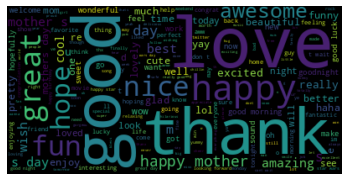

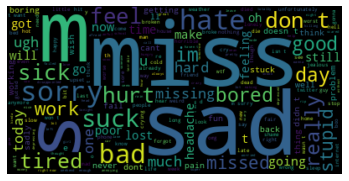

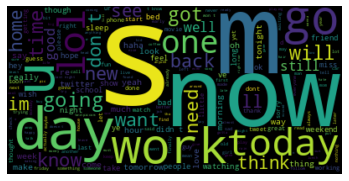

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 

# Create stopword list:
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud()
#nltk.download('stopwords')
#stopwords.update(["br", "href"])
positiveText = " ".join(text for text in df['selected_text'][df['sentiment'] == 'positive'])
wordcloud.generate(positiveText)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

textt = " ".join(text for text in df['selected_text'][df['sentiment'] == 'negative'])
wordcloud.generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

textt = " ".join(text for text in df['selected_text'][df['sentiment'] == 'neutral'])
wordcloud.generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

1,1     1,2     1,3
()
2,1     2,2     2,3

3,1     3,2     3,3

|/_|/_
|/_|/_

list<vect>
when build:
    if !list.contains(vect):
    build
    list.add(vect)

